Shortcut          | Significado   
------------------|----------------
**CTRL + Enter**  | ejecutar celta 
**SHIFT + Enter** | ejecutar celda y pasar a siguiente
**ALT + Enter**   | ejecutar celda y crear una debajo

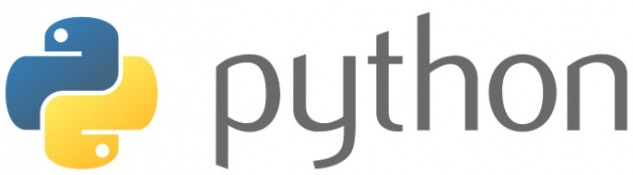

---

# Introducción a la sintaxis de Python II - librerías
_En esta clase se analizará datos almacenados en una serie de archivos `.csv`. Se usará como ejemplo la evolución de la inflamación en pacientes (filas) ante un tratamiento de artritis a lo largo de los días de tratamiento (columnas)._

**Objetivos:**

* Primer contacto con librerías: qué son y para qué se usan
* Cargar una librería y acceder a sus contenidos
* Leer datos de un archivo de texto y almacenarlos en un array
* Acceder a elementos y secciones del array
* Operar con elementos del array
* Representar los datos en gráficos sencillos
---

## Cargando los datos

Para cargar los datos, se usará por primera vez una librería. Las librerías empaquetan distintas funciones, estructuras de datos, variables, etc., que pueden ser reutilizadas en otros programas. En este caso se recurrirá a **NumPy**.

Una vez importada la librería con su alias **np** (podría haber sido "npy", o "nm", o cualquier otro), se puede acceder a sus funciones:

La expresión `np.loadtxt(...)` es una llamada a la función [`loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) perteneciente a `numpy`. Mediante el punto se indica "pertenencia a".

En la línea anterior se cargan los datos, pero aún no se ha almacenado en ninguna variable.

Para comprobar el tipo de dato que es `data`:

Y para comprobar el tipo de los valores que contiene:

Se obtiene un [`numpy.ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), un __bloque de memoria que contiene elementos del mismo tipo__, float64. Básicamente:

* _recuerdan_ a los vectores, matrices, tensores...
* se puede almacenar el array con un nombre y acceder a sus __elementos__ mediante sus __índices__.
* ayudan a gestionar de manera eficiente la memoria y a acelerar los cálculos.
---

| Índice     | 0     | 1     | 2     | 3     | ...   | n-1   | n  |
| ---------- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Valor      | 2.1   | 3.6   | 7.8   | 1.5   | ...   | 5.4   | 6.3 |

---
__¿Qué se suele guardar en arrays?__

* Vectores y matrices.
* Datos de experimentos:
    - En distintos instantes discretos.
    - En distintos puntos del espacio.
* Resultado de evaluar funciones con los datos anteriores.
* Discretizaciones para usar algoritmos de: integración, derivación, interpolación, etc.
* etc.

Según se observa al imprimir el contenido de `data`, es un array de dos dimensiones, pero ¿de cuántos elementos? ¿y cuántos elementos en cada dimensión?

Tiene 60 filas (pacientes) y 40 columnas (días), es decir, 2400 elementos (mediciones). Tanto [`size`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.size.html) como [`shape`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) son atributos del array, esto es, variables ligadas al array.

## Accediendo a elementos del array 

Se usa corchetes, al igual que con listas y tuplas:

Recordad que en Python **la indexación comienza en cero**, como en C, C++, Java y Perl, y a diferencia de lenguajes como MATLAB y Fortran (aunque en este último se puede elegir).

Por lo tanto, un array de M&times;N (M filas y N columnas) tiene índices que van desde 0 hasta M-1 y N-1. En el array "data" de tamaño (60x40) el último elemento sería el:

## Accediendo a secciones del array 

Con `[30, 20]` se accede a un solo elemento del array, pero es posible seleccionar varios elementos a la vez mediante la sintaxis `[valor_inicial:valor_final:salto]`. 

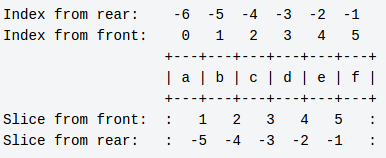

Por ejemplo, para acceder a los primeros diez días (columnas) en los primeros cuatro pacientes (filas):

En realidad, no hace falta poner el valor_inicial si este es cero:

Si no se especifica el valor_final, se accederá hasta el último elemento:

Y para cualquier otra sección:

Si no se especifica, el step es 1. Variando este parámetro se saltan elementos:

<div class="alert alert-info"> No olvidar, **¡el último no está incluido!**</div>

## Operando con el array

NumPy no solo provee una estructura eficiente de almacenar elementos, sino también funciones para operar con ellos. Por ejemplo, para obtener la inflamación media:

La función media está disponible como **función** ([`np.mean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)) y como **método** de un array (`ndarray.mean()`). Un método es una función que pertenece a un elemento, del mismo modo que las variables que pertenecen a ese elemento se llaman atributos.

Los arrays de NumPy tienen numerosos métodos:

Cuando se analizan datos, es típico aplicar estas funciones a partes del array, por ejemplo: a un paciente en concreto o un día en concreto. Ejemplo para un paciente en los 40 días de tratamiento:

Si se quiere hacer esto para cada uno de los 60 pacientes, se debe aplicar esta operación a uno eje entero. En este caso, la media a lo largo de cada fila, es decir, calcular la media a lo largo de las columnas (`axis = 1`)

Devuelve un array de 60 valores. Para comprobar esto:

Aplicando la misma función al otro eje, se obtendría la media diaría de la inflamación en todos los pacientes:

Devuelve un array de 40 valores. Comprobación:

##### Ejercicio

No sólo de un array se pueden hacer secciones, ya hemos visto que las listas y tuples también lo permitían y a lo largo del curso nos toparemos con otras colecciones de datos a las que se puede acceder de este modo. Vamos a usar el slicing sobre los strings. Partiremos del string `"oxygen"`:

1.  ¿Qué devuelve `element[:4]`? 
    ¿y  `element[4:]`?
    ¿y `element[:]`?

2.  ¿Qué valor tiene `element[-1]`?
    ¿y `element[-2]`?
    Dados estos resultados, ¿qué hace  `element[1:-1]`?

3.  La expresión `element[3:3]` produce una cadena vacía 
    ¿qué devuelve `data[3:3, 4:4]`?
    ¿y  `data[3:3, :]`?

## Visualización
Una de las mejores maneras de extraer información de los datos es representarlos. A continuación se hará una pequeña introducción a la visualización con matplotlib.

Empezando con la *función mágica*:

Las funciones mágicas son funciones propias de IPython (el motor de los Jupyter Notebooks). En este caso indica que la salida de la representación quede embebida en el Notebook.

Después se importa el módulo pyplot de matplotlib:

y se representan todos los datos:

Las regiones azules corresponden a valores bajos de inflamación, mientras que las amarillas indican valores más altos. Se aprecia que a lo largo de los cuarenta días la inflamación aumenta alcanzando su máximo alrededor del día 20, disminuyendo en todos los pacientes.

Para representar ahora la inflamación media de todos los pacientes para cada día:

Inflamación máxima y mínima a lo largo de los días:

##### Ejercicio 

1. Crear una gráfica que muestre la desviación típica de los datos cada día para todos los pacientes
2. Crear una gráfica que muestre a la vez la inflamación máxima, media y mínima para cada día.

---
** En definitiva**:
* Se puede importar una librería usando un alias
* Se han usado atributos de los arrays como `shape` y `size`, así como métodos como [`max`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html) y [`std`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.std.html)
* Se ha accedido a elementos y secciones de un array
* Se han aplicado algunos de los métodos a columnas o filas de un array
* Para representar datos, la librería matplotlib

** Los materiales de esta clase son una adaptación de: http://swcarpentry.github.io/python-novice-inflammation/ distribuido bajo licencia [Creative Commons Attribution license](https://software-carpentry.org/license/)**

---
[@AeroPython](https://github.com/aeropython): Mabel Delgado, Alejandro Sáez, Andrés Quezada